In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
training_set = pd.read_csv('https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_testing-set.csv')

In [0]:
testing_set = pd.read_csv('https://cloudstor.aarnet.edu.au/plus/s/2DhnLGDdEECo4ys/download?path=%2FUNSW-NB15%20-%20CSV%20Files%2Fa%20part%20of%20training%20and%20testing%20set&files=UNSW_NB15_training-set.csv')

In [4]:
training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
training_set.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


##EDA

In [6]:
print(training_set.isnull().values.sum())
print(testing_set.isnull().values.sum())

0
0


In [7]:
for i in list(training_set.attack_cat.unique()):
  class_count = len(training_set[training_set.attack_cat == i])
  print(f'{i} have {class_count} rows')

Normal have 56000 rows
Backdoor have 1746 rows
Analysis have 2000 rows
Fuzzers have 18184 rows
Shellcode have 1133 rows
Reconnaissance have 10491 rows
Exploits have 33393 rows
DoS have 12264 rows
Worms have 130 rows
Generic have 40000 rows


###Change categorical features to numbers

In [8]:
cat_col = training_set.select_dtypes(include='object').columns

cat_col

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [0]:
one_hot_training = pd.get_dummies(training_set, columns=['proto', 'service', 'state'])
one_hot_testing = pd.get_dummies(testing_set, columns=['proto', 'service', 'state'])

In [10]:
train_col = list(one_hot_training.columns.values)
test_col = list(one_hot_testing.columns.values)

print('One_hot_testing')
for i in train_col:
  if i not in test_col:
    one_hot_testing[i] = 0
    test_col.append(i)
    print(f'Append {i} into one_hot_testing')
print('---------------------------------------------------')
print('One_hot_training')
for i in test_col:
  if i not in train_col:
    one_hot_training[i] = 0
    train_col.append(i)
    print(f'Append {i} into one_hot_training')

One_hot_testing
Append proto_icmp into one_hot_testing
Append proto_rtp into one_hot_testing
Append state_ECO into one_hot_testing
Append state_PAR into one_hot_testing
Append state_URN into one_hot_testing
Append state_no into one_hot_testing
---------------------------------------------------
One_hot_training
Append state_ACC into one_hot_training
Append state_CLO into one_hot_training


In [11]:
one_hot_df = one_hot_training.append(one_hot_testing)

del one_hot_training
del one_hot_testing

one_hot_df = one_hot_df.sample(frac=1)
one_hot_df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,state_ACC,state_CLO
36577,36578,0.004188,8,10,1044,824,4059.216592,31,29,1.745941e+06,1.417383e+06,2,2,0.548429,0.400778,34.761096,0.737545,255,1282184241,1283194755,255,0.000735,0.000577,0.000158,131,82,1,83,2,0,9,2,1,7,0,0,1,12,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
120496,120497,1.749188,22,22,1182,1612,24.582836,62,252,5.163539e+03,7.038695e+03,7,9,83.294667,79.584187,4374.549229,5074.067630,255,3765350484,1448497995,255,0.098105,0.065707,0.032398,54,73,0,0,1,1,2,1,1,2,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
59014,59015,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000e+00,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,5,2,1,1,1,5,0,0,0,2,5,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
118331,118332,0.000002,2,0,114,0,500000.001300,254,0,2.280000e+08,0.000000e+00,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,22,2,13,13,13,22,0,0,0,15,22,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
67975,67976,1.275339,188,44,224531,2760,181.128311,254,252,1.400958e+06,1.692413e+04,91,8,6.819995,29.098977,690.024503,35.154883,255,684157216,2919137108,255,0.056560,0.023560,0.033000,1194,63,0,0,1,1,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36146,36147,0.155218,84,86,4862,77276,1088.791212,31,29,2.476517e+05,3.936554e+06,7,36,1.864735,1.819435,95.640625,94.574848,255,162445786,2335659765,255,0.000698,0.000563,0.000135,58,899,0,0,7,0,2,1,1,1,0,0,0,2,10,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49773,49774,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000e+00,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,4,2,3,2,2,4,0,0,0,2,4,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
46040,46041,0.465550,10,8,834,354,36.515948,254,252,1.290517e+04,5.327033e+03,2,1,49.843556,59.061430,3299.245887,115.473766,255,70049193,263619289,255,0.101563,0.052114,0.049449,83,44,1,0,1,1,1,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29758,29759,0.027159,36,38,2334,16290,2687.875124,31,29,6.686549e+05,4.672337e+06,7,12,0.668486,0.715378,50.419051,45.781449,255,715184188,715491982,255,0.000813,0.000684,0.000129,65,429,0,0,7,0,2,1,1,1,0,0,0,4,7,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
col = list(one_hot_df.columns)

col

['id',
 'dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label',
 'proto_3pc',
 'proto_a/n',
 'proto_aes-sp3-d',
 'proto_any',
 'proto_argus',
 'proto_aris',
 'proto_arp',
 'proto_ax.25',
 'proto_bbn-rcc',
 'proto_bna',
 'proto_br-sat-mon',
 'proto_cbt',
 'proto_cftp',
 'proto_chaos',
 'proto_compaq-peer',
 'proto_cphb',
 'proto_cpnx',
 'proto_crtp',
 'proto_crudp',
 'proto_dcn',
 'proto_ddp',
 'proto_ddx',
 'proto_dgp',
 'proto_egp',
 'proto_eigrp',
 'proto_emcon',
 'proto_encap',
 'proto_etherip',
 'proto_fc',
 'proto_fire',
 'p

In [0]:
from sklearn.preprocessing import LabelEncoder

label = one_hot_df[['attack_cat', 'label']]
one_hot_df.drop(columns=['attack_cat', 'label'], inplace=True)
one_hot_df[['attack_cat', 'label']] = label

le = LabelEncoder()
le.fit(list(one_hot_df['attack_cat'].values))
one_hot_df['attack_cat'] = le.transform(list(one_hot_df['attack_cat'].values))

In [14]:
for i, attack in enumerate(le.classes_):
  print(f'{i}: {attack}')

0: Analysis
1: Backdoor
2: DoS
3: Exploits
4: Fuzzers
5: Generic
6: Normal
7: Reconnaissance
8: Shellcode
9: Worms


In [15]:
one_hot_df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_-,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,state_ACC,state_CLO,attack_cat,label
36577,36578,0.004188,8,10,1044,824,4059.216592,31,29,1.745941e+06,1.417383e+06,2,2,0.548429,0.400778,34.761096,0.737545,255,1282184241,1283194755,255,0.000735,0.000577,0.000158,131,82,1,83,2,0,9,2,1,7,0,0,1,12,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0
120496,120497,1.749188,22,22,1182,1612,24.582836,62,252,5.163539e+03,7.038695e+03,7,9,83.294667,79.584187,4374.549229,5074.067630,255,3765350484,1448497995,255,0.098105,0.065707,0.032398,54,73,0,0,1,1,2,1,1,2,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1
59014,59015,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000e+00,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,5,2,1,1,1,5,0,0,0,2,5,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1
118331,118332,0.000002,2,0,114,0,500000.001300,254,0,2.280000e+08,0.000000e+00,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,22,2,13,13,13,22,0,0,0,15,22,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,1
67975,67976,1.275339,188,44,224531,2760,181.128311,254,252,1.400958e+06,1.692413e+04,91,8,6.819995,29.098977,690.024503,35.154883,255,684157216,2919137108,255,0.056560,0.023560,0.033000,1194,63,0,0,1,1,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36146,36147,0.155218,84,86,4862,77276,1088.791212,31,29,2.476517e+05,3.936554e+06,7,36,1.864735,1.819435,95.640625,94.574848,255,162445786,2335659765,255,0.000698,0.000563,0.000135,58,899,0,0,7,0,2,1,1,1,0,0,0,2,10,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0
49773,49774,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000e+00,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,4,2,3,2,2,4,0,0,0,2,4,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,1
46040,46041,0.465550,10,8,834,354,36.515948,254,252,1.290517e+04,5.327033e+03,2,1,49.843556,59.061430,3299.245887,115.473766,255,70049193,263619289,255,0.101563,0.052114,0.049449,83,44,1,0,1,1,1,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,1
29758,29759,0.027159,36,38,2334,16290,2687.875124,31,29,6.686549e+05,4.672337e+06,7,12,0.668486,0.715378,50.419051,45.781449,255,715184188,715491982,255,0.000813,0.000684,0.000129,65,429,0,0,7,0,2,1,1,1,0,0,0,4,7,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0


In [0]:
one_hot_X = one_hot_df.iloc[:,1:197]
one_hot_y_cat = one_hot_df.iloc[:,-2]
one_hot_y_label = one_hot_df.iloc[:,-1]

###Correlation Matrix

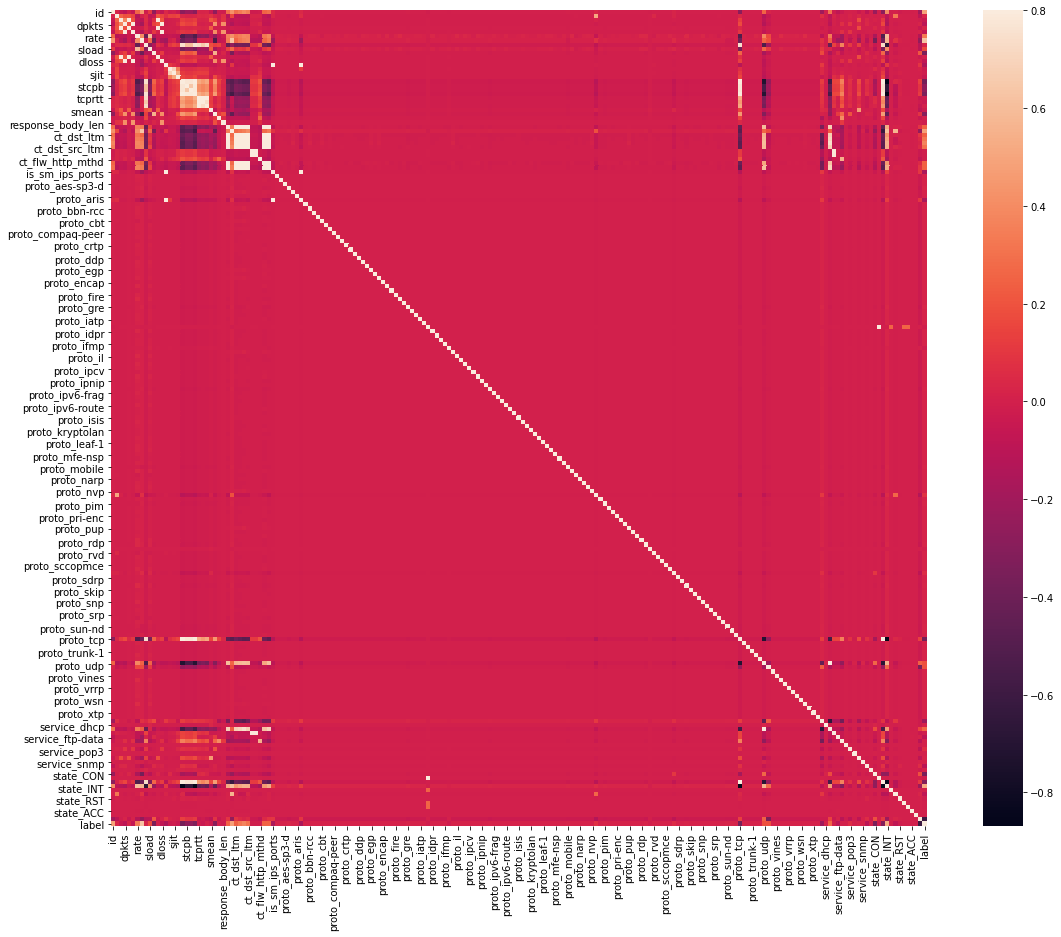

In [17]:
correlation_matrix = one_hot_df.corr()
fig = plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

##PCA - Original

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(one_hot_X)
pca_X = pca.transform(one_hot_X)

print(pca.explained_variance_ratio_)

[0.81434858 0.17735921 0.00829072]


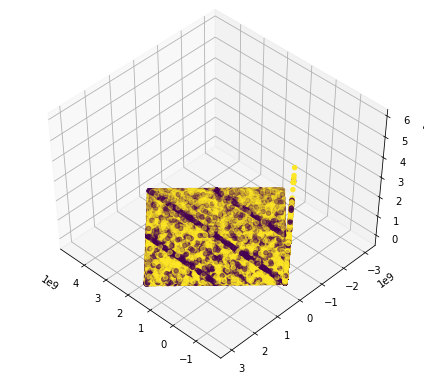

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.scatter(pca_X[:, 0], pca_X[:, 1], pca_X[:, 2], c=one_hot_y_label)
plt.show()

## StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(one_hot_X)
standard_X = scaler.transform(one_hot_X)

pd.DataFrame(standard_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
0,-0.207979,-0.086630,-0.076034,-0.043326,-0.092773,-0.543797,-1.453837,-0.494448,-0.370766,0.314699,-0.044061,-0.088333,-0.131715,-0.090046,-0.109813,-0.147962,1.046159,0.201832,0.205957,1.066927,-0.487612,-0.428453,-0.485645,-0.032244,-0.156076,1.263396,-0.038003,-0.681754,-1.335262,0.360855,-0.396808,-0.520051,-0.118964,-0.110419,-0.110372,1.272996,0.619319,-0.654825,-0.120335,-0.022639,...,-0.022639,-0.022639,-0.749613,-0.253848,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022725,-0.022639,-0.022639,-1.102088,-0.021585,-0.602713,-0.140384,-0.146181,2.922252,-0.010791,-0.077236,-0.009028,-0.165987,-0.020572,-0.076674,-0.018272,-0.291137,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,-0.00394,-0.00197
1,0.084106,0.016351,0.031123,-0.042532,-0.087383,-0.568959,-1.151363,1.483170,-0.380139,-0.269932,0.032187,0.042015,-0.119762,-0.017670,-0.021308,1.142913,1.046159,2.017288,0.327158,1.066927,0.560413,0.780877,0.218738,-0.406210,-0.191504,-0.143883,-0.039675,-0.774092,-0.327500,-0.495547,-0.519345,-0.520051,-0.568574,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,-0.022639,...,-0.022639,-0.022639,-0.749613,-0.253848,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022725,-0.022639,-0.022639,-1.102088,-0.021585,-0.602713,7.123311,-0.146181,-0.342202,-0.010791,-0.077236,-0.009028,-0.165987,-0.020572,-0.076674,-0.018272,-0.291137,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,-0.00394,-0.00197
2,-0.208678,-0.130765,-0.165331,-0.048183,-0.098409,0.123841,0.722026,-0.751628,0.098423,-0.272850,-0.074561,-0.125576,-0.131793,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,-0.182802,-0.478859,-0.143883,-0.039675,-0.404737,0.680262,-0.617890,-0.519345,-0.520051,-0.298808,-0.110419,-0.110372,-0.193597,-0.571689,-0.378956,-0.120335,-0.022639,...,-0.022639,-0.022639,-0.749613,3.939360,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022725,-0.022639,-0.022639,0.907368,-0.021585,-0.602713,-0.140384,-0.146181,-0.342202,-0.010791,-0.077236,-0.009028,-0.165987,-0.020572,-0.076674,-0.018272,-0.291137,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,-0.00394,-0.00197
3,-0.208680,-0.130765,-0.165331,-0.048678,-0.098409,2.549177,0.722026,-0.751628,0.847416,-0.272850,-0.074561,-0.125576,-0.131794,-0.090412,-0.110522,-0.148150,-0.955926,-0.735580,-0.734888,-0.937314,-0.495523,-0.439166,-0.489097,-0.391640,-0.478859,-0.143883,-0.039675,1.165022,0.680262,0.850228,0.951098,1.537738,1.229868,-0.110419,-0.110372,-0.193597,0.976621,1.184301,-0.120335,-0.022639,...,-0.022639,-0.022639,1.334022,-0.253848,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022725,-0.022639,-0.022639,-1.102088,-0.021585,1.659165,-0.140384,-0.146181,-0.342202,-0.010791,-0.077236,-0.009028,-0.165987,-0.020572,-0.076674,-0.018272,-0.291137,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,-0.00394,-0.00197
4,0.004791,1.237416,0.227576,1.242756,-0.079531,-0.567983,0.722026,1.483170,-0.372624,-0.265834,1.313167,0.023394,-0.130809,-0.063815,-0.096450,-0.139205,1.046159,-0.235389,1.405439,1.066927,0.113251,-0.001706,0.231891,5.130439,-0.230868,-0.143883,-0.039675,-0.774092,-0.327500,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,-0.022639,...,-0.022639,-0.022639,-0.749613,-0.253848,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022639,-0.022725,-0.022639,-0.022639,-1.102088,-0.021585

##PCA - StandardScaler

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(standard_X)
pca_X = pca.transform(standard_X)

print(pca.explained_variance_ratio_)

[0.06763674 0.02366697 0.01943184]


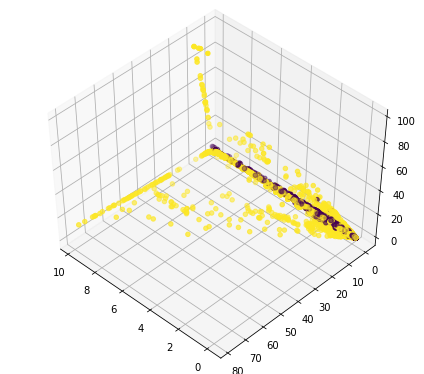

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.scatter(standard_X[:, 0], standard_X[:, 1], standard_X[:, 2], c=one_hot_y_label)
plt.show()

#Classify Binary Classes

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_X, one_hot_y_label, test_size=0.33, random_state=42)

##Training model

###Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=42).fit(X_train, y_train)
lr.predict(X_train)

print(f'Cross Validation Score of LR Classifier: {cross_val_score(lr, X_train, y_train)}')
print(f'Accuracy of LR Classifier: {lr.score(X_train, y_train)}')

Cross Validation Score of LR Classifier: [0.8060994  0.80534639 0.80572289 0.80615732 0.80479611]
Accuracy of LR Classifier: 0.8056707599629286


###Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, log_loss, precision_score)

nb = GaussianNB().fit(X_train, y_train)
nb_y = nb.predict(X_train)

print(f'Cross Validation Score of NB Classifier: {cross_val_score(nb, X_train, y_train)}')
print(f'Accuracy of NB Classifier: {accuracy_score(y_train, nb_y)}')

Cross Validation Score of NB Classifier: [0.76193234 0.76170065 0.76227989 0.76734824 0.75889133]
Accuracy of NB Classifier: 0.7625926784059314


###Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_y = dt.predict(X_train)

print(f'Cross Validation Score of DT Classifier: {cross_val_score(dt, X_train, y_train)}')
print(f'Accuracy of DT Classifier: {accuracy_score(y_train, dt_y)}')

Cross Validation Score of DT Classifier: [0.93341636 0.93306881 0.93385079 0.93414041 0.93382183]
Accuracy of DT Classifier: 0.9977699258572753


###Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf_y = rf.predict(X_train)

print(f'Cross Validation Score of RF Classifier: {cross_val_score(rf, X_train, y_train)}')
print(f'Accuracy of RF Classifier: {accuracy_score(y_train, rf_y)}')

Cross Validation Score of RF Classifier: [0.94717331 0.94810009 0.9482449  0.94659407 0.94833179]
Accuracy of RF Classifier: 0.9977699258572753


###AdaBoost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)
ada_y = ada.predict(X_train)

print(f'Cross Validation Score of Ada Classifier: {cross_val_score(ada, X_train, y_train)}')
print(f'Accuracy of Ada Classifier: {accuracy_score(y_train, ada_y)}')

Cross Validation Score of Ada Classifier: [0.92472776 0.92501738 0.92472776 0.91803753 0.92310589]
Accuracy of Ada Classifier: 0.9248899443929565


###Neural Network

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = keras.Sequential([
    Dense(100, activation=tf.nn.relu, input_shape=(32, 196)),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

print('Training neural network...')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=20, verbose=2, validation_split = 0.1, callbacks=early_stop)

Training neural network...
Epoch 1/20
4856/4856 - 8s - loss: 5971488800768.0000 - accuracy: 0.5050 - val_loss: 3137299283968.0000 - val_accuracy: 0.2985
Epoch 2/20
4856/4856 - 8s - loss: 130666299392.0000 - accuracy: 0.4765 - val_loss: 10302000128.0000 - val_accuracy: 0.2834
Epoch 3/20
4856/4856 - 8s - loss: 32447647744.0000 - accuracy: 0.5244 - val_loss: 769331392.0000 - val_accuracy: 0.6808
Epoch 4/20
4856/4856 - 8s - loss: 6199734784.0000 - accuracy: 0.3645 - val_loss: 30955829248.0000 - val_accuracy: 0.3087
Epoch 5/20
4856/4856 - 8s - loss: 365316544.0000 - accuracy: 0.3189 - val_loss: 529452480.0000 - val_accuracy: 0.3363
Epoch 6/20
4856/4856 - 8s - loss: 2565804544.0000 - accuracy: 0.3331 - val_loss: 69464727552.0000 - val_accuracy: 0.2743
Epoch 7/20
4856/4856 - 8s - loss: 433601920.0000 - accuracy: 0.3397 - val_loss: 60562252.0000 - val_accuracy: 0.3660
Epoch 8/20
4856/4856 - 8s - loss: 88144560.0000 - accuracy: 0.3917 - val_loss: 7.7886 - val_accuracy: 0.6466
Epoch 9/20
4856/48

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 100)           19700     
_________________________________________________________________
dense_1 (Dense)              (None, 32, 50)            5050      
_________________________________________________________________
dense_2 (Dense)              (None, 32, 20)            1020      
_________________________________________________________________
dense_3 (Dense)              (None, 32, 1)             21        
Total params: 25,791
Trainable params: 25,791
Non-trainable params: 0
_________________________________________________________________


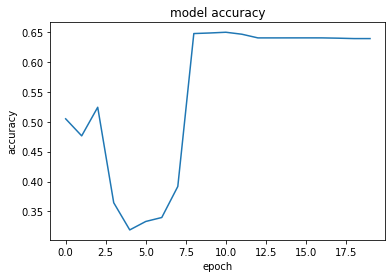

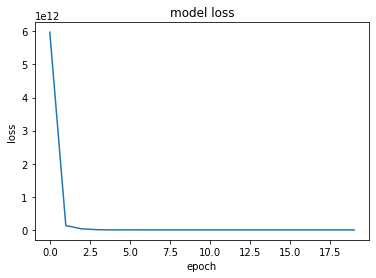

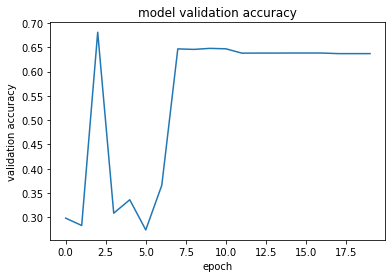

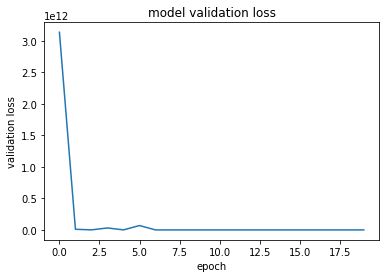

In [31]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure()
# summarize history for validation loss
plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
nn_y = list(map(lambda x: 0 if x < 0.5 else 1, model.predict(X_train)))

# print(f'Cross Validation Score of NN: {cross_val_score(model, X_train, y_train)}')
print(f'Accuracy of NN Classifier: {accuracy_score(y_train, nn_y)}')

Accuracy of NN Classifier: 0.6391160797034291


##Evaluate (Binary)

In [33]:
lr_y = lr.predict(X_test)
nb_y = nb.predict(X_test)
dt_y = dt.predict(X_test)
rf_y = rf.predict(X_test)
ada_y = ada.predict(X_test)
nn_y = list(map(lambda x: 0 if x < 0.5 else 1, model.predict(X_test)))

print(f'Precision of Logistic Regression Classifier: {precision_score(y_test, lr_y, average="weighted")}')
print(f'Precision of Naive Bayes Classifier: {precision_score(y_test, nb_y, average="weighted")}')
print(f'Precision of Decision Tree Classifier: {precision_score(y_test, dt_y, average="weighted")}')
print(f'Precision of Random Forest Classifier: {precision_score(y_test, rf_y, average="weighted")}')
print(f'Precision of AdaBoost Classifier: {precision_score(y_test, ada_y, average="weighted")}')
print(f'Precision of Neural Network: {precision_score(y_test, nn_y, average="weighted")}')
print()

print(f'Cross Entropy of Logistic Regression Classifier: {log_loss(y_test, lr_y)}')
print(f'Cross Entropy of Naive Bayes Classifier: {log_loss(y_test, nb_y)}')
print(f'Cross Entropy of Decision Tree Classifier: {log_loss(y_test, dt_y)}')
print(f'Cross Entropy of Random Forest Classifier: {log_loss(y_test, rf_y)}')
print(f'Cross Entropy of AdaBoost Classifier: {log_loss(y_test, ada_y)}')
print(f'Cross Entropy of Neural Network: {log_loss(y_test, nn_y)}')
print()

print(f'Recall of Logistic Regression Classifier: {recall_score(y_test, lr_y, average="binary")}')
print(f'Recall of Naive Bayes Classifier: {recall_score(y_test, nb_y, average="binary")}')
print(f'Recall of Decision Tree Classifier: {recall_score(y_test, dt_y, average="binary")}')
print(f'Recall of Random Forest Classifier: {recall_score(y_test, rf_y, average="binary")}')
print(f'Recall of AdaBoost Classifier: {recall_score(y_test, ada_y, average="binary")}')
print(f'Recall of Neural Network: {recall_score(y_test, nn_y, average="binary")}')
print()

print(f'F1-Score of Logistic Regression Classifier: {f1_score(y_test, lr_y , average="binary")}')
print(f'F1-Score of Naive Bayes Classifier: {f1_score(y_test, nb_y , average="binary")}')
print(f'F1-Score of Decision Tree Classifier: {f1_score(y_test, dt_y , average="binary")}')
print(f'F1-Score of Random Forest Classifier: {f1_score(y_test, rf_y , average="binary")}')
print(f'F1-Score of AdaBoost Classifier: {f1_score(y_test, ada_y , average="binary")}')
print(f'F1-Score of Neural Network: {f1_score(y_test, nn_y , average="binary")}')
print()

Precision of Logistic Regression Classifier: 0.8202525174519888
Precision of Naive Bayes Classifier: 0.7600187594924154
Precision of Decision Tree Classifier: 0.9358477337179896
Precision of Random Forest Classifier: 0.9493441076923205
Precision of AdaBoost Classifier: 0.9246812635679359


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of Neural Network: 0.4083196924381007

Cross Entropy of Logistic Regression Classifier: 6.670841614657131
Cross Entropy of Naive Bayes Classifier: 8.157438717755394
Cross Entropy of Decision Tree Classifier: 2.214930083294377
Cross Entropy of Random Forest Classifier: 1.751877527029712
Cross Entropy of AdaBoost Classifier: 2.593497595932472
Cross Entropy of Neural Network: 12.46882227178728

Recall of Logistic Regression Classifier: 0.9589958775029447
Recall of Naive Bayes Classifier: 0.8430690518256773
Recall of Decision Tree Classifier: 0.9503275912838633
Recall of Random Forest Classifier: 0.9588118374558304
Recall of AdaBoost Classifier: 0.9467940223792697
Recall of Neural Network: 1.0

F1-Score of Logistic Regression Classifier: 0.8638665771433782
F1-Score of Naive Bayes Classifier: 0.8202075182854228
F1-Score of Decision Tree Classifier: 0.9498468641643749
F1-Score of Random Forest Classifier: 0.9602521449833654
F1-Score of AdaBoost Classifier: 0.9415694349119196
F1-Sco

##Confusion Matrix

In [0]:
def drawMatrixHeatmap(title):
  fig=plt.figure(figsize=(12, 12))
  for i, mk in zip(range(1, columns*rows +1),matrix.keys()):
      ax = fig.add_subplot(rows, columns, i)
      ax.title.set_text(mk)
      sns.heatmap(matrix[mk], 
                  fmt='d',
                  annot=True,
                  cmap="bwr",
                  linewidths=0.1,
                  linecolor='white')
  fig.suptitle(title)
  plt.show()

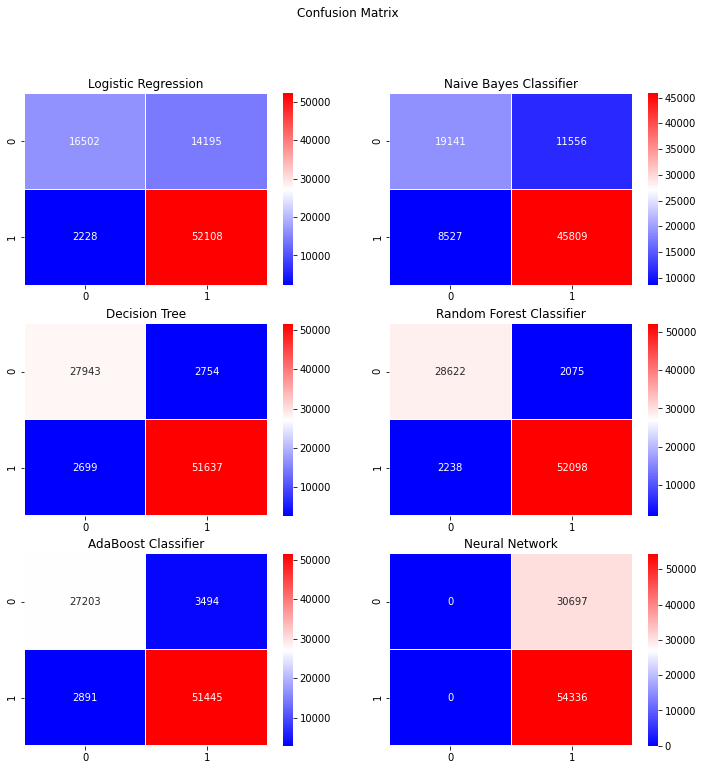

Accuracy of Logistic Regression Classifier: 0.8068632178095563
Accuracy of Naive Bayes Classifier: 0.7638211047475686
Accuracy of Decision Tree Classifier: 0.9358719555937107
Accuracy of Random Forest Classifier: 0.9492785153999036
Accuracy of AdaBoost Classifier: 0.924911504945139
Accuracy of Neural Network: 0.6389989768678043


In [35]:
from sklearn import metrics

columns=2
rows=3

matrix = {'Logistic Regression':metrics.confusion_matrix(y_test, lr_y), 'Naive Bayes Classifier':metrics.confusion_matrix(y_test, nb_y), 
          'Decision Tree':metrics.confusion_matrix(y_test, dt_y), 'Random Forest Classifier':metrics.confusion_matrix(y_test, rf_y), 
          'AdaBoost Classifier':metrics.confusion_matrix(y_test, ada_y), 'Neural Network':metrics.confusion_matrix(y_test, nn_y)}
          
drawMatrixHeatmap('Confusion Matrix')


# print('Logistic Regression')
# print(metrics.confusion_matrix(y_test, lr_y))
print(f'Accuracy of Logistic Regression Classifier: {accuracy_score(y_test, lr_y)}')


# print('Naive Bayes')
# print(metrics.confusion_matrix(y_test, nb_y))
print(f'Accuracy of Naive Bayes Classifier: {accuracy_score(y_test, nb_y)}')



# print('Decision Tree')
# print(metrics.confusion_matrix(y_test, dt_y))
print(f'Accuracy of Decision Tree Classifier: {accuracy_score(y_test, dt_y)}')



# print('Random Forest')
# print(metrics.confusion_matrix(y_test, rf_y))
print(f'Accuracy of Random Forest Classifier: {accuracy_score(y_test, rf_y)}')



# print('AdaBoost')
# print(metrics.confusion_matrix(y_test, ada_y))
print(f'Accuracy of AdaBoost Classifier: {accuracy_score(y_test, ada_y)}')


# print('Neural Network')
# print(metrics.confusion_matrix(y_test, nn_y))
print(f'Accuracy of Neural Network: {accuracy_score(y_test, nn_y)}')



# Classify Multi Classes

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_X, one_hot_y_cat, test_size=0.33, random_state=42)

##Training model

###KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
knn_y = knn.predict(X_train)

print(f'Accuracy of KNN Classifier: {accuracy_score(y_train, knn_y)}')

Accuracy of KNN Classifier: 0.7169427710843373


###Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_y = dt.predict(X_train)

print(f'Accuracy of DT Classifier: {accuracy_score(y_train, dt_y)}')

Accuracy of DT Classifier: 0.9176841983317887


###AdaBoost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)
ada_y = ada.predict(X_train)

print(f'Accuracy of Ada Classifier: {accuracy_score(y_train, ada_y)}')

Accuracy of Ada Classifier: 0.5644983781278962


##Evaluate (Multi Classes)

In [40]:
knn_y = knn.predict(X_test)
dt_y = dt.predict(X_test)
ada_y = ada.predict(X_test)

print(f'Precision of KNN Classifier: {precision_score(y_test, knn_y, average="weighted")}')
print(f'Precision of Decision Tree Classifier: {precision_score(y_test, dt_y, average="weighted")}')
print(f'Precision of AdaBoost Classifier: {precision_score(y_test, ada_y, average="weighted")}')
print()

print(f'Recall of KNN Classifier: {recall_score(y_test, knn_y, average="weighted")}')
print(f'Recall of Decision Tree Classifier: {recall_score(y_test, dt_y, average="weighted")}')
print(f'Recall of AdaBoost Classifier: {recall_score(y_test, ada_y, average="weighted")}')
print()

print(f'F1-Score of KNN Classifier: {f1_score(y_test, knn_y , average="weighted")}')
print(f'F1-Score of Decision Tree Classifier: {f1_score(y_test, dt_y , average="weighted")}')
print(f'F1-Score of AdaBoost Classifier: {f1_score(y_test, ada_y , average="weighted")}')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of KNN Classifier: 0.6690412576389848
Precision of Decision Tree Classifier: 0.8062716843066484
Precision of AdaBoost Classifier: 0.5722656183551154

Recall of KNN Classifier: 0.6608493173238625
Recall of Decision Tree Classifier: 0.8052050380440535
Recall of AdaBoost Classifier: 0.5657921042418825

F1-Score of KNN Classifier: 0.654435524406576
F1-Score of Decision Tree Classifier: 0.8036089220207039
F1-Score of AdaBoost Classifier: 0.5608167126249559


##Confusion Matrix

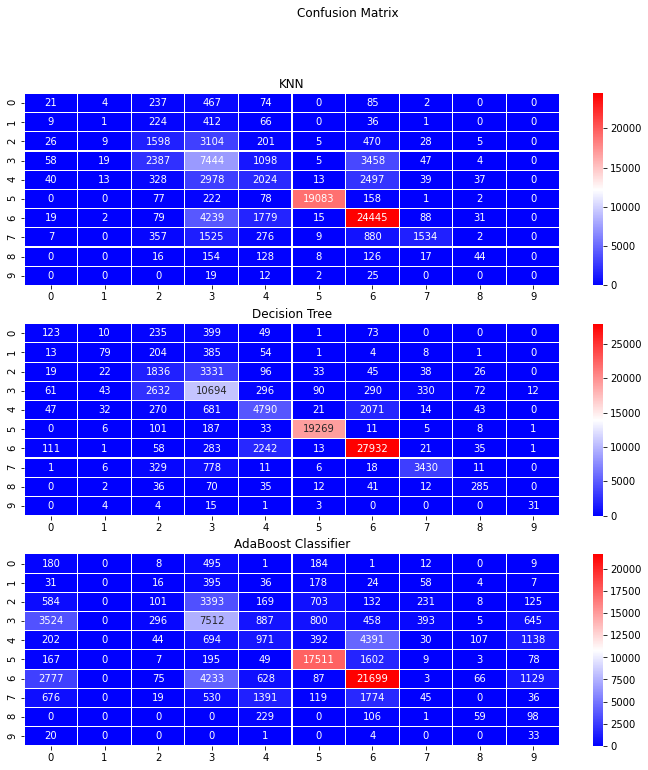

Accuracy of Naive Bayes Classifier: 0.6608493173238625
Accuracy of Decision Tree Classifier: 0.8052050380440535
Accuracy of AdaBoost Classifier: 0.5657921042418825


In [41]:
columns=1
rows=3

matrix = {'KNN':metrics.confusion_matrix(y_test, knn_y), 'Decision Tree':metrics.confusion_matrix(y_test, dt_y),  
          'AdaBoost Classifier':metrics.confusion_matrix(y_test, ada_y)}
          
drawMatrixHeatmap('Confusion Matrix')


# print('KNN')
# print(metrics.confusion_matrix(y_test, knn_y))
print(f'Accuracy of Naive Bayes Classifier: {accuracy_score(y_test, knn_y)}')

# print('Decision Tree')
# print(metrics.confusion_matrix(y_test, dt_y))
print(f'Accuracy of Decision Tree Classifier: {accuracy_score(y_test, dt_y)}')

# print('AdaBoost')
# print(metrics.confusion_matrix(y_test, ada_y))
print(f'Accuracy of AdaBoost Classifier: {accuracy_score(y_test, ada_y)}')